In [44]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
Nxsweep = np.loadtxt('../data/energies.dat')

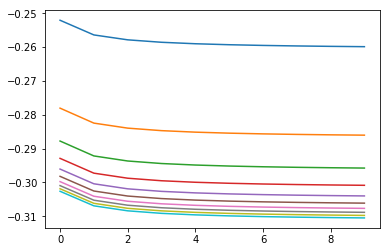

In [4]:
[plt.plot(Nxsweep[10*i: 10*(i+1)]) for i in range(10)]; plt.show()

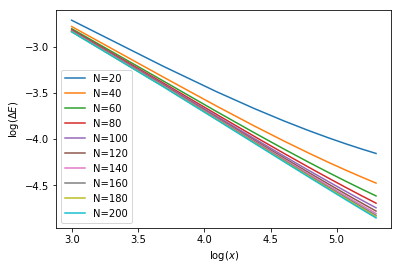

In [35]:
[plt.plot(np.log(range(20,220,20)), np.log(Nxsweep[i::10]+1/np.pi), label="N=%d"%(20*(i+1))) for i in range(10)]; 
plt.legend()
plt.xlabel(r"$\log(x)$")
plt.ylabel(r"$\log(\Delta E)$")
plt.show()

# linear fit

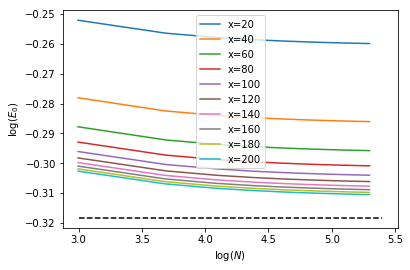

In [43]:
[plt.plot(np.log(range(20,220,20)), Nxsweep[10*i:10*(i+1)], label="x=%d"%(20*(i+1))) for i in range(10)]; 
plt.hlines(-1/np.pi,3.0,5.4,linestyles='--')
plt.legend()
plt.xlabel(r"$\log(N)$")
plt.ylabel(r"$\log(E_0)$")
plt.show()